In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
dataset=pd.read_csv("titanic.csv")

In [4]:
dataset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


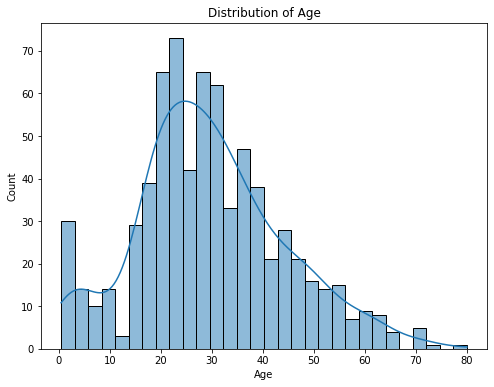

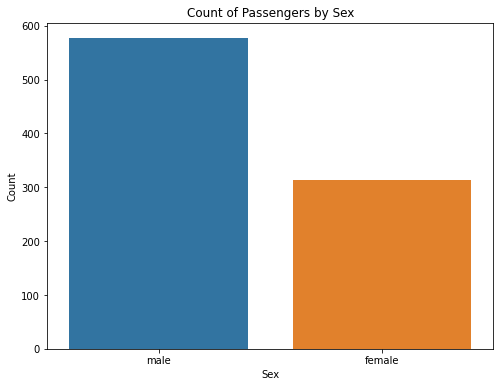

In [5]:
# Univariate Analysis
plt.figure(figsize=(8, 6))
sns.histplot(data=dataset, x="age", bins=30, kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()
plt.figure(figsize=(8, 6))
sns.countplot(data=dataset, x="sex")
plt.title("Count of Passengers by Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

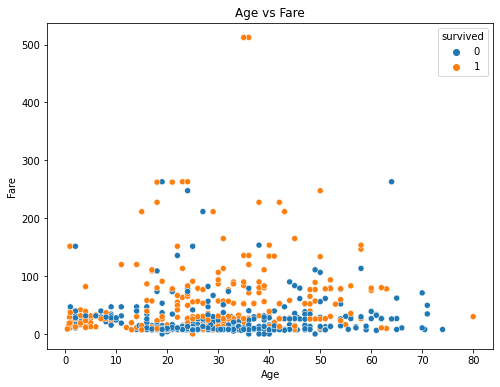

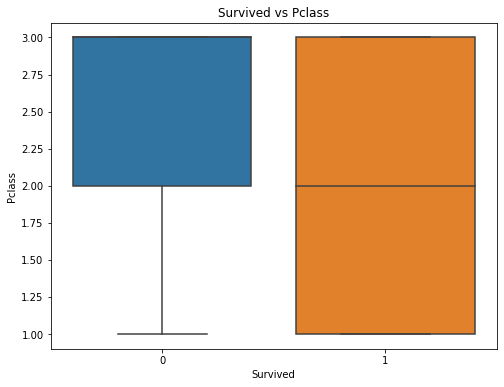

In [6]:
#Bivariate Analysis

plt.figure(figsize=(8, 6))
sns.scatterplot(data=dataset, x="age", y="fare", hue="survived")
plt.title("Age vs Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()
plt.figure(figsize=(8, 6))
sns.boxplot(data=dataset, x="survived", y="pclass")
plt.title("Survived vs Pclass")
plt.xlabel("Survived")
plt.ylabel("Pclass")
plt.show()

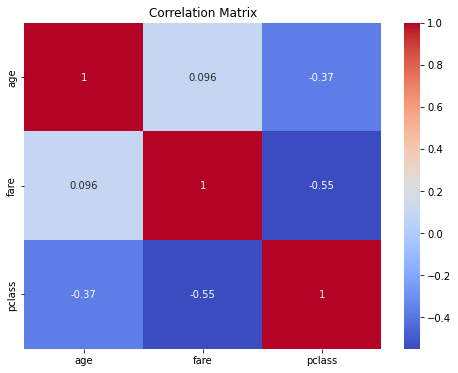

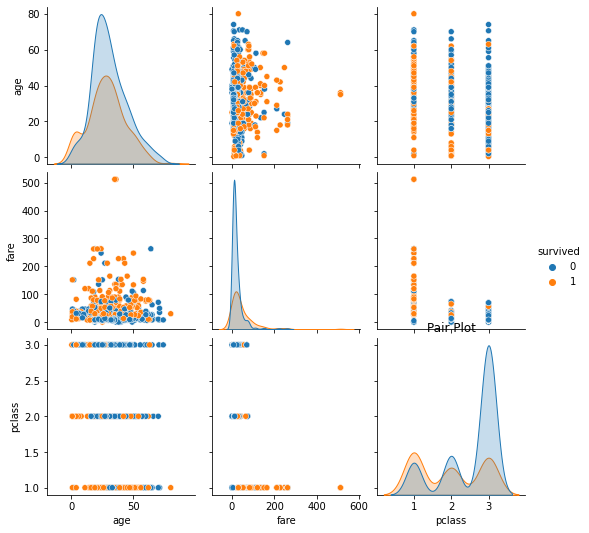

In [8]:
#Multivariate Analysis
corr_matrix = dataset[["age", "fare", "pclass"]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

sns.pairplot(data=dataset, vars=["age", "fare", "pclass"], hue="survived")
plt.title("Pair Plot")
plt.show()

In [9]:
#Descriptive Statistics
selected_columns = ["age", "fare"]
statistics = dataset[selected_columns].describe()
print(statistics)

              age        fare
count  714.000000  891.000000
mean    29.699118   32.204208
std     14.526497   49.693429
min      0.420000    0.000000
25%     20.125000    7.910400
50%     28.000000   14.454200
75%     38.000000   31.000000
max     80.000000  512.329200


In [18]:
# Find outliers using z-score method
z_scores = zscore(dataset["fare"])
threshold = 3 
outliers = np.where(np.abs(z_scores) > threshold)[0]
print("Indices of outliers:")
print(outliers)

NameError: name 'zscore' is not defined

In [17]:
# Identify outliers using Winsorization
winsorized_fare = winsorize(dataset["fare"], limits=[0.05, 0.05])
dataset["fare"] = winsorized_fare
print("fare values after replacing outliers:")
print(dataset["fare"])

NameError: name 'winsorize' is not defined

In [10]:
#Checking Categorical Columns and Performing Encoding
categorical_columns = dataset.select_dtypes(include=["object"]).columns
print("Categorical Columns:")
print(categorical_columns)

encoded_dataset = pd.get_dummies(dataset, columns=categorical_columns)
print("\nEncoded Dataset:")
print(encoded_dataset.head())

Categorical Columns:
Index(['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive'], dtype='object')

Encoded Dataset:
   survived  pclass   age  sibsp  parch     fare  adult_male  alone  \
0         0       3  22.0      1      0   7.2500        True  False   
1         1       1  38.0      1      0  71.2833       False  False   
2         1       3  26.0      0      0   7.9250       False   True   
3         1       1  35.0      1      0  53.1000       False  False   
4         0       3  35.0      0      0   8.0500        True   True   

   sex_female  sex_male  ...  deck_C  deck_D  deck_E  deck_F  deck_G  \
0           0         1  ...       0       0       0       0       0   
1           1         0  ...       1       0       0       0       0   
2           1         0  ...       0       0       0       0       0   
3           1         0  ...       1       0       0       0       0   
4           0         1  ...       0       0       0       0       0   

   embark_

In [11]:
#Handling Missing Values
missing_values = dataset.isnull().sum()
print("Missing Values:")
print(missing_values)

dataset.dropna(inplace=True)
dataset["age"].fillna(dataset["age"].mean(), inplace=True)
dataset["embarked"].fillna(dataset["embarked"].mode()[0], inplace=True)

missing_values_after_handling = dataset.isnull().sum()
print("Missing Values after Handling:")
print(missing_values_after_handling)

Missing Values:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64
Missing Values after Handling:
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64


In [12]:
#Splitting Data into Dependent and Independent Variables

X = dataset.drop("survived", axis=1) 
y = dataset["survived"]

print("Independent Variables (Features):")
print(X.head())

print("\nDependent Variable (Target):")
print(y.head())

Independent Variables (Features):
    pclass     sex   age  sibsp  parch     fare embarked  class    who  \
1        1  female  38.0      1      0  71.2833        C  First  woman   
3        1  female  35.0      1      0  53.1000        S  First  woman   
6        1    male  54.0      0      0  51.8625        S  First    man   
10       3  female   4.0      1      1  16.7000        S  Third  child   
11       1  female  58.0      0      0  26.5500        S  First  woman   

    adult_male deck  embark_town alive  alone  
1        False    C    Cherbourg   yes  False  
3        False    C  Southampton   yes  False  
6         True    E  Southampton    no   True  
10       False    G  Southampton   yes  False  
11       False    C  Southampton   yes   True  

Dependent Variable (Target):
1     1
3     1
6     0
10    1
11    1
Name: survived, dtype: int64


In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Select the independent variables (features)
X = dataset.drop("survived", axis=1)

# Scale the independent variables using StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

# Display the scaled independent variables
scaled_dataset = pd.DataFrame(scaled_X, columns=X.columns)
print("Scaled Independent Variables:")
print(scaled_dataset.head())

ValueError: could not convert string to float: 'female'

In [14]:
#Split the data into dependent and independent variables
X = dataset.drop("survived", axis=1) 
y = dataset["survived"] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (145, 14)
Shape of X_test: (37, 14)
Shape of y_train: (145,)
Shape of y_test: (37,)
